# Task 2
### The idea is to implement autoencoder - neural network where input is bascially mapped to output, and has some "bottleneck" in between

#### Importing Libs/API

In [1]:
import cv2
from matplotlib import pyplot as plt
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import pprint


#### Importing default MNIST tensorflow keras data 

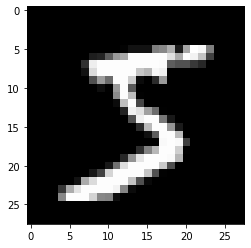

In [2]:
#TODO 1: Split the data intox1,x2,x3,x4,x5,x6,x7,x8,x9,10
(xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.mnist.load_data()
#? Checking the shape of the data, small preview
plt.imshow(xTrain[0], cmap='gray')

In [3]:
print(xTrain.shape)
print(xTrain[0].shape)
# TODO Problem, the data has 28*28 inputs? Must optimize the data
preview = xTrain[0][:8]
np.set_printoptions( linewidth=784)
print(preview)
#* The data normalization for better processing for neural network
print(xTrain.dtype)

xTrain = xTrain.reshape((len(xTrain), np.prod(xTrain.shape[1:])))
xTest = xTest.reshape((len(xTest), np.prod(xTest.shape[1:])))
xTrain =  xTrain.astype('float32') / (255)
xTest = xTest.astype('float32') / (255)

(60000, 28, 28)
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]]
uint8


## Encoder part

In [4]:

# #* No need for convolutional layers in this case (Grayscale), just a simple fully connected layer
# encoderInput = keras.Input(shape=(28, 28, 1), name='MINST_img')
# #* Maps the input to a vector of size 784
# x = keras.layers.Flatten()(encoderInput)
# # x = keras.layers.Dense(128, activation='relu')(x)
# encoderOutput = keras.layers.Dense(64, activation='relu')(x)
# encoder = keras.Model(encoderInput, encoderOutput, name='encoderProcess')


## Decoder part

In [5]:
# decoderInput = keras.layers.Dense(64, activation="relu")(encoderOutput)
# decoderInput_transform = keras.layers.Dense(784, activation='relu')(decoderInput)
# # x = keras.layers.Dense(784, activation='relu')(decoderInput_transform)
# #* Need to reshape the output to the pervious stace of the input
# decoderOutput = keras.layers.Reshape((28, 28, 1))(decoderInput_transform)
# decoder = keras.Model(encoderInput, decoderOutput, name='decoderProcess')

In [45]:
encoding_dimension = 32
# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = keras.layers.Dense(encoding_dimension, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded =keras.layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded, name='Autoencoder')
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded, name='Encoder')
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dimension,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input), name='Decoder')


### Tensorflow/Keras configuration

In [46]:

#* Gradient clipping involves forcing the gradient values (element-wise) to a specific minimum
#* or maximum value if the gradient exceeded an expected range.
# opt = keras.optimizers.Adam(lr=0.001, decay=0.0001, clipvalue=0.5, clipnorm=1, amsgrad=True, ) #* Adam optimizer
opt = keras.optimizers.Adam(lr=0.001, decay=1e-6) #* Adam optimizer
# opt = keras.optimizers.Adam(lr=0.001, decay=0.0001) #* Adam optimizer
es = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

c:\Users\szink\OneDrive\Pulpit\Studia\MachineLearning\virtualEnv_ML_DIR\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [55]:
# autoencoder = keras.Model(encoderInput, decoderOutput, name='autoencoder')
autoencoder.compile(optimizer=opt, loss='mse')
# autoencoder = keras.Model(encoderInput, decoderOutput, name='autoencoder')
encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None

In [48]:
# autoencoder = keras.Model(encoderInput, decoderOutput, name='autoencoder')
autoencoder.compile(optimizer=opt, loss='mse')

#* The fit function is used to go from 784 to 64 atributres
#* If I can get the encoder to work, I can use the decoder to get the original image - thus proving that the encoder is working
#* Rather than feeding the encoder with the original image, it is possible feed it with the encoded image(that still has the same meaning)

# autoencoder.fit(xTrain, xTrain, epochs=10, batch_size=128,validation_split= 0.1 , validation_data=(xTest, xTest))
autoencoder.fit(xTrain, xTrain, epochs=10, batch_size=32,validation_split= 0.1, callbacks=[es], shuffle=True)
# autoencoder.fit(xTrain, xTrain, epochs=10, batch_size=128,validation_split= 0.1)
# autoencoder.fit(xTrain, xTrain, epochs=3, batch_size=128,validation_split= 0.1)

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0340 - val_loss: 0.0175
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0143 - val_loss: 0.0122
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0115 - val_loss: 0.0111
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 8/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 9/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 10/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.010

In [49]:

#* predict takes in list of predictions and outputs list of predictions
encodedImgs = encoder.predict(xTest)
decodedImgs = decoder.predict(encodedImgs)
# example = encoder.predict([xTest[0].reshape(-1,28,28,1)])[0]
example = encoder.predict([xTest[0].reshape(-1,784)])[0]
print("example.shape", example.shape)
example2 = decoder.predict([example.reshape(-1,encoding_dimension)])[0]
print("example2.shape", example2.shape)
print("This is the 'encoded' example _>")
print(example)

example.shape (32,)
example2.shape (784,)
This is the 'encoded' example _>
[ 2.366815    5.615285    3.2996836   1.4027162   4.5468183   2.8579345   6.791286    5.618843    8.12968     8.099736   11.920179    0.16522682  6.42631    10.904352    9.921184    4.885868    3.773844    5.957467    9.953076   10.961497    7.263204    7.148325    9.006678    0.12850547  0.          5.978803    6.246127    6.492277    7.5893826   5.471554    3.2373815   4.378117  ]


#### Encoded image

example.shape (32,)
example2.shape (784,)


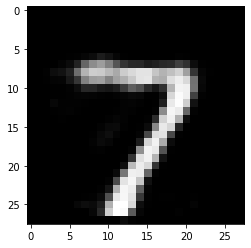

In [50]:
# plt.imshow(example.reshape(8,8), cmap='Accent_r')
print("example.shape", example.shape)
print("example2.shape", example2.shape)
plt.imshow(example2.reshape(-1,28), cmap='gray')
# plt.imshow(example2.reshape(28,28), cmap='gray')

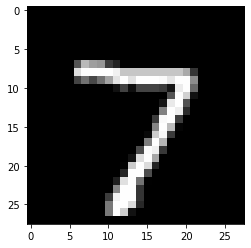

In [51]:
plt.imshow(xTest[0].reshape(28,28), cmap='gray')


#### How it is supposed to look

In [52]:
encoded_imgs = encoder.predict(xTest)
decoded_imgs = decoder.predict(encoded_imgs)
autoencoded_imgs = autoencoder.predict(xTest)

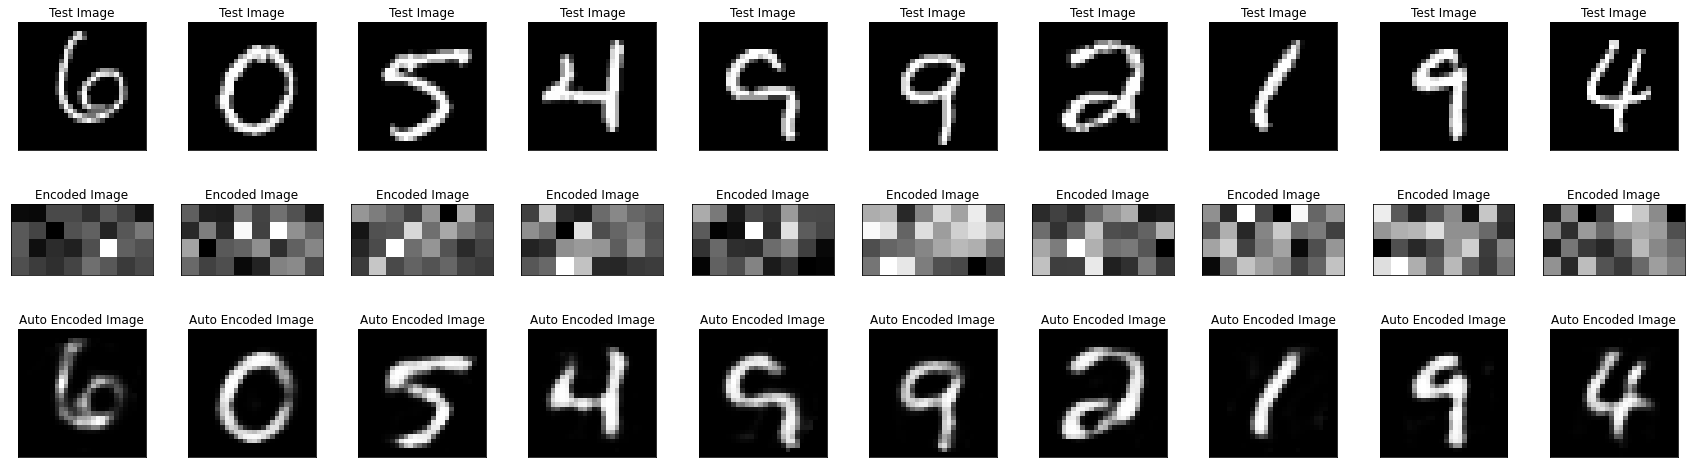

In [53]:
n = 10  # How many digits we will display
plt.figure(figsize=(30,8))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(xTest[i+100].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Test Image")

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    # plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.imshow(encoded_imgs[i+100].reshape(-1,8), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Encoded Image")
    
    # Display autoencoder
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(autoencoded_imgs[i+100].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax.set_title("Auto Encoded Image")
    
plt.show()

In [54]:
# print("This is the 'decoded' example (hopefully) _>")
# print(xTest[0].shape)
# plt.imshow(xTest[0], cmap='gray')

#### Decoded image